In [ ]:
!pip install pmdarima yfinance tensorflow scikit-learn matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Prerequisite: Load the data
data = yf.download("TSLA", start="2015-01-01", end="2025-01-31")  # Adjust dates as needed
data = data[['Close']]  # Select only the 'Close' price
data.columns = ['TSLA']  # Rename for convenience

# Ensure the index is a datetime and set frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Adjust frequency as needed

# Handle missing values (if any)
data = data.interpolate()  # Interpolate to fill NaNs

# Task 2: Time Series Forecasting (necessary for Task 3)
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Auto ARIMA model selection
auto_arima_model = auto_arima(train["TSLA"], seasonal=False, trace=True, stepwise=True)

# Fit ARIMA Model
p, d, q = auto_arima_model.order
arima_model = ARIMA(train["TSLA"], order=(p, d, q))
arima_result = arima_model.fit()

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16520.979, Time=3.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16577.410, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16563.567, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16565.809, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16575.758, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16547.592, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16548.328, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16499.449, Time=7.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16549.481, Time=2.18 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16499.869, Time=10.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16522.605, Time=7.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16544.056, Time=5.80 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16550.664, Time=2.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16483.703, Time=10.41 sec
 ARIMA(5,1,3)(0,0

# Forecast Future Market Trends

In [6]:
# Extend Forecast for 6-12 months
future_steps = 252  # Approximate trading days in a year
forecast_result = arima_result.get_forecast(steps=future_steps)
future_forecast = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=future_steps+1, freq='B')[1:]

# Extract confidence intervals
lower_bound = forecast_conf_int.iloc[:, 0]
upper_bound = forecast_conf_int.iloc[:, 1]

# Visual

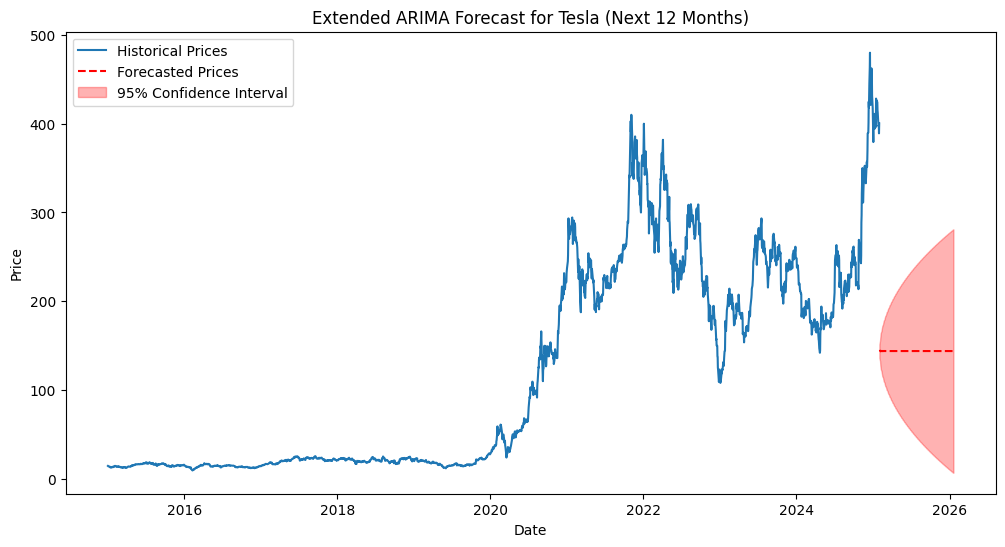

In [7]:
# Plot extended forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["TSLA"], label="Historical Prices")
plt.plot(future_dates, future_forecast, label="Forecasted Prices", linestyle="dashed", color='red')
plt.fill_between(future_dates, lower_bound, upper_bound, color='red', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("Extended ARIMA Forecast for Tesla (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Analysis of Forecast

In [8]:
# Analyze Forecast Trends
print("Forecast Analysis:")
print(f"Expected Price Range: {future_forecast.min():.2f} to {future_forecast.max():.2f}")
trend = "Upward" if future_forecast.iloc[-1] > data["TSLA"].iloc[-1] else "Downward"
print(f"Overall Trend: {trend}")

# Volatility and Risk Analysis
forecast_volatility = future_forecast.diff().std()
print(f"Expected Volatility (Standard Deviation of Changes): {forecast_volatility:.4f}")

# Market Opportunities and Risks
if trend == "Upward":
    print("Potential Market Opportunities: Expected price increases.")
else:
    print("Potential Market Risks: Possible declines in price.")

Forecast Analysis:
Expected Price Range: 143.72 to 144.31
Overall Trend: Downward
Expected Volatility (Standard Deviation of Changes): 0.0563
Potential Market Risks: Possible declines in price.


# Short Summary

1. Expected Price Range:
  * Forecasted Price Range: $143.72 to $144.31
  * This indicates a narrow band of expected future prices, reflecting a relatively stable projection.
2. Overall Trend:
  * Trend: Downward
  * The forecast suggests a continued decline in Tesla's stock prices over the upcoming months.
3. Expected Volatility:
  * Standard Deviation of Changes: 0.0563
  * This metric indicates the anticipated volatility in price changes, suggesting a moderate level of fluctuation.
4. Potential Market Risks:
  * Risks: Possible declines in price
  * The downward trend and potential for volatility highlight risks for investors, suggesting caution in trading strategies.


## Visualization:

The forecast includes confidence intervals, illustrating the range within which future prices are expected to lie. This visual representation helps assess the uncertainty associated with the predictions.

## Trend Analysis:

The analysis reveals a downward trend, indicating that Tesla's stock price may continue to face challenges in the near term. Any patterns or anomalies observed should be monitored closely.

## Volatility and Risk:

The confidence intervals provide insight into the uncertainty of the forecast. Wider intervals may indicate periods of increased volatility, warranting attention for potential market shifts.